In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam

In [7]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [10]:
# load dataset
dataframe = pandas.read_csv('GIST/gistdescriptor/csv/gist_features_novo.csv')
dataframe = dataframe[dataframe.movimento != 'expressi']
dataframe = dataframe[dataframe.movimento != 'surreal']
# dataset = dataframe.values
# X = dataset[:,0:4].astype(float)
# Y = dataset[:,4]
dataframe.head()

,1,2,3,4,5,6,7,8,9,10,...,504,505,506,507,508,509,510,511,512,movimento
0,0.040872,0.026046,0.031888,0.031802,0.045637,0.028557,0.029052,0.024881,0.041972,0.031753,...,0.019535,0.025143,0.026722,0.019233,0.022982,0.035760,0.032581,0.022699,0.023147,cubismo
1,0.025189,0.031033,0.020803,0.052219,0.033755,0.082306,0.061525,0.035114,0.044286,0.082721,...,0.054864,0.051175,0.044639,0.038003,0.037454,0.042146,0.039121,0.031736,0.065594,cubismo
2,0.044789,0.043912,0.053136,0.048234,0.027754,0.060134,0.053850,0.039132,0.017572,0.036503,...,0.027338,0.009305,0.040873,0.053220,0.094131,0.031189,0.028340,0.052651,0.047595,cubismo
3,0.058681,0.063877,0.055330,0.044311,0.044976,0.049671,0.062203,0.037533,0.051769,0.041197,...,0.053707,0.076790,0.075326,0.080421,0.038775,0.059012,0.083436,0.053357,0.022034,cubismo
4,0.052587,0.050844,0.051622,0.055163,0.059608,0.039518,0.045610,0.038433,0.050198,0.030257,...,0.064296,0.053977,0.053491,0.060315,0.048700,0.064706,0.037589,0.047011,0.044072,cubismo


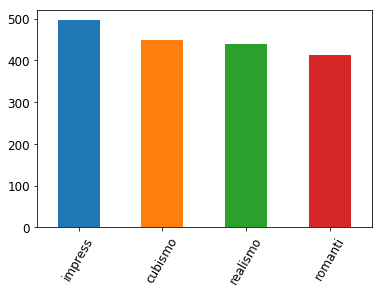

In [11]:
dataframe['movimento'].value_counts().plot(kind='bar', rot=60, fontsize=12)

In [12]:
# dataframe = dataframe[:2048]
X = dataframe.drop(['movimento'], axis=1)
y = dataframe['movimento']

In [13]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,503,504,505,506,507,508,509,510,511,512
0,0.040872,0.026046,0.031888,0.031802,0.045637,0.028557,0.029052,0.024881,0.041972,0.031753,...,0.017685,0.019535,0.025143,0.026722,0.019233,0.022982,0.035760,0.032581,0.022699,0.023147
1,0.025189,0.031033,0.020803,0.052219,0.033755,0.082306,0.061525,0.035114,0.044286,0.082721,...,0.045010,0.054864,0.051175,0.044639,0.038003,0.037454,0.042146,0.039121,0.031736,0.065594
2,0.044789,0.043912,0.053136,0.048234,0.027754,0.060134,0.053850,0.039132,0.017572,0.036503,...,0.052087,0.027338,0.009305,0.040873,0.053220,0.094131,0.031189,0.028340,0.052651,0.047595
3,0.058681,0.063877,0.055330,0.044311,0.044976,0.049671,0.062203,0.037533,0.051769,0.041197,...,0.076462,0.053707,0.076790,0.075326,0.080421,0.038775,0.059012,0.083436,0.053357,0.022034
4,0.052587,0.050844,0.051622,0.055163,0.059608,0.039518,0.045610,0.038433,0.050198,0.030257,...,0.083751,0.064296,0.053977,0.053491,0.060315,0.048700,0.064706,0.037589,0.047011,0.044072


In [14]:
y.head()

0    cubismo
1    cubismo
2    cubismo
3    cubismo
4    cubismo
Name: movimento, dtype: object

In [15]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [24]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1024, input_dim=512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer='tanh', metrics=['accuracy'])
    return model

In [26]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=128, verbose=0)

In [27]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))